# 🏆 About Project 

 **🎯 Objective**

 Porter is India's Largest Marketplace for Intra-City Logistics. Leader in the country's $40 billion intra-city logistics market, Porter strives to improve the lives of 1,50,000+ driver-partners by providing them with consistent earning & independence. Currently, the company has serviced 5+ million customers

Porter works with a wide range of restaurants for delivering their items directly to the people.

Porter has a number of delivery partners available for delivering the food, from various restaurants and wants to get an estimated delivery time that it can provide the customers on the basis of what they are ordering, from where and also the delivery partners.

This dataset has the required data to train a regression model that will do the delivery time estimation, based on all those features



**📅 Data Dictionary**

Each row in this file corresponds to one unique delivery. Each column corresponds to a feature as explained below.

- market_id : integer id for the market where the restaurant lies
- created_at : the timestamp at which the order was placed
- actual_delivery_time : the timestamp when the order was delivered
- store_primary_category : category for the restaurant
- order_protocol : integer code value for order protocol(how the order was placed ie: through porter, call to restaurant, pre booked, third part etc)
- total_items subtotal : final price of the order
- num_distinct_items : the number of distinct items in the order
- min_item_price : price of the cheapest item in the order
- max_item_price : price of the costliest item in order
- total_onshift_partners : number of delivery partners on duty at the time order was placed
- total_busy_partners : number of delivery partners attending to other tasks
- total_outstanding_orders : total number of orders to be fulfilled at the moment

# 🚀 Let's Get Started

##  📚 Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.express as px
import warnings
import time
warnings.filterwarnings("ignore")

## 📅 Importing Dataset

In [2]:
df = pd.read_csv('/kaggle/input/porter-dataset/dataset.csv')
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


## 🎨 Custom Color Palette 

In [3]:
def custom_palette(custom_colors):
    customPalette = sns.set_palette(sns.color_palette(custom_colors))
    sns.palplot(sns.color_palette(custom_colors),size=0.8)
    plt.tick_params(axis='both', labelsize=0, length = 0)
    

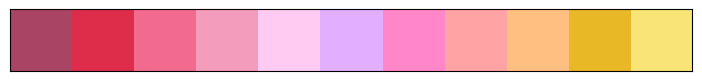

In [4]:
#defining colour palette
red = ["#4f000b","#720026","#ce4257","#ff7f51","#ff9b54"]
bo = ["#6930c3","#5e60ce","#0096c7","#48cae4","#ade8f4","#ff7f51","#ff9b54","#ffbf69"]
pink = ["#aa4465","#dd2d4a","#f26a8d","#f49cbb","#ffcbf2","#e2afff","#ff86c8","#ffa3a5","#ffbf81","#e9b827","#f9e576"]
custom_palette(pink)

##  💹 Basic Analysis

**Shape of the Data**

In [5]:
df.shape

(197428, 14)

**Inference**:

- Shape of dataframe is 197428 * 14
- Number of rows = 197428
- Number of columns = 14

**First 5 Rows**

In [6]:
df.head()

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0


**Columns in a Dataframe**

In [7]:
df.columns

Index(['market_id', 'created_at', 'actual_delivery_time', 'store_id',
       'store_primary_category', 'order_protocol', 'total_items', 'subtotal',
       'num_distinct_items', 'min_item_price', 'max_item_price',
       'total_onshift_partners', 'total_busy_partners',
       'total_outstanding_orders'],
      dtype='object')

**Concise Summary**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197428 entries, 0 to 197427
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   market_id                 196441 non-null  float64
 1   created_at                197428 non-null  object 
 2   actual_delivery_time      197421 non-null  object 
 3   store_id                  197428 non-null  object 
 4   store_primary_category    192668 non-null  object 
 5   order_protocol            196433 non-null  float64
 6   total_items               197428 non-null  int64  
 7   subtotal                  197428 non-null  int64  
 8   num_distinct_items        197428 non-null  int64  
 9   min_item_price            197428 non-null  int64  
 10  max_item_price            197428 non-null  int64  
 11  total_onshift_partners    181166 non-null  float64
 12  total_busy_partners       181166 non-null  float64
 13  total_outstanding_orders  181166 non-null  f

**Inference**:

The columns 'market_id', 'actual_delivery_time', 'store_primary_category', 'order_protocol', 'total_onshift_partners', 'total_busy_partners', and 'total_outstanding_orders' have missing values.

**Statistical Summary**

In [9]:
# Statistical Summary of numeric Columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
market_id,196441.0,2.978706,1.524867,1.0,2.0,3.0,4.0,6.0
order_protocol,196433.0,2.882352,1.503771,1.0,1.0,3.0,4.0,7.0
total_items,197428.0,3.196391,2.666546,1.0,2.0,3.0,4.0,411.0
subtotal,197428.0,2682.331402,1823.093688,0.0,1400.0,2200.0,3395.0,27100.0
num_distinct_items,197428.0,2.670791,1.630255,1.0,1.0,2.0,3.0,20.0
min_item_price,197428.0,686.218470,522.038648,-86.0,299.0,595.0,949.0,14700.0
max_item_price,197428.0,1159.588630,558.411377,0.0,800.0,1095.0,1395.0,14700.0
total_onshift_partners,181166.0,44.808093,34.526783,-4.0,17.0,37.0,65.0,171.0
total_busy_partners,181166.0,41.739747,32.145733,-5.0,15.0,34.0,62.0,154.0
total_outstanding_orders,181166.0,58.050065,52.661830,-6.0,17.0,41.0,85.0,285.0


In [10]:
# Statistical Summary of Categorical Columns
df.describe(include='object').T

,count,unique,top,freq
created_at,197428,180985,2015-02-11 19:50:43,6
actual_delivery_time,197421,178110,2015-02-08 04:09:25,5
store_id,197428,6743,d43ab110ab2489d6b9b2caa394bf920f,937
store_primary_category,192668,74,american,19399


**Checking For Missing Values**

In [11]:
np.round(((df.isnull().sum())/(df.shape[0]))*100,2)

market_id                   0.50
created_at                  0.00
actual_delivery_time        0.00
store_id                    0.00
store_primary_category      2.41
order_protocol              0.50
total_items                 0.00
subtotal                    0.00
num_distinct_items          0.00
min_item_price              0.00
max_item_price              0.00
total_onshift_partners      8.24
total_busy_partners         8.24
total_outstanding_orders    8.24
dtype: float64

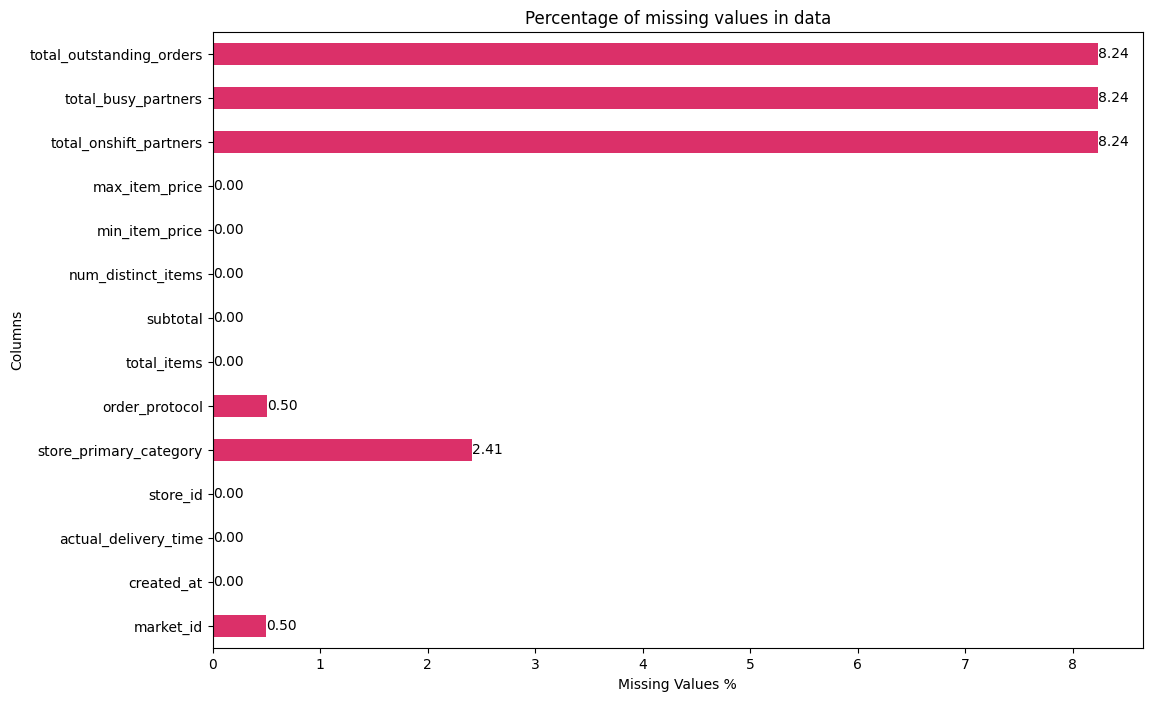

In [12]:
plt.figure(figsize = (12,8))
ax = ((df.isnull().sum()/df.shape[0])*100).plot(kind = 'barh', color = '#DB3069')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')
plt.xlabel('Missing Values %')
plt.ylabel('Columns')
plt.title('Percentage of missing values in data')
sns.set_style('darkgrid')
plt.show()

In [13]:
df['order_protocol'].value_counts()

order_protocol
1.0    54725
3.0    53199
5.0    44290
2.0    24052
4.0    19354
6.0      794
7.0       19
Name: count, dtype: int64

# ⚒️  Data Preprocessing

## ♊ Duplicate Value check

In [14]:
df[df.duplicated()]

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders


In [15]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [market_id, created_at, actual_delivery_time, store_id, store_primary_category, order_protocol, total_items, subtotal, num_distinct_items, min_item_price, max_item_price, total_onshift_partners, total_busy_partners, total_outstanding_orders]
Index: []


## 🧹 Handling Missing Values

Startegies to handle missing data

1️⃣ Numeric Features:

For numeric features we can use median imputation to prevent extreme values from affecting the distribution

2️⃣ Categorical/Discerete Features:

All categorical features have only 2 to 5 unique values, making it suitable to impute missing values using the most frequent category.

**Missing Values Check**

In [16]:
np.round(((df.isnull().sum())/(df.shape[0]))*100,2)

market_id                   0.50
created_at                  0.00
actual_delivery_time        0.00
store_id                    0.00
store_primary_category      2.41
order_protocol              0.50
total_items                 0.00
subtotal                    0.00
num_distinct_items          0.00
min_item_price              0.00
max_item_price              0.00
total_onshift_partners      8.24
total_busy_partners         8.24
total_outstanding_orders    8.24
dtype: float64

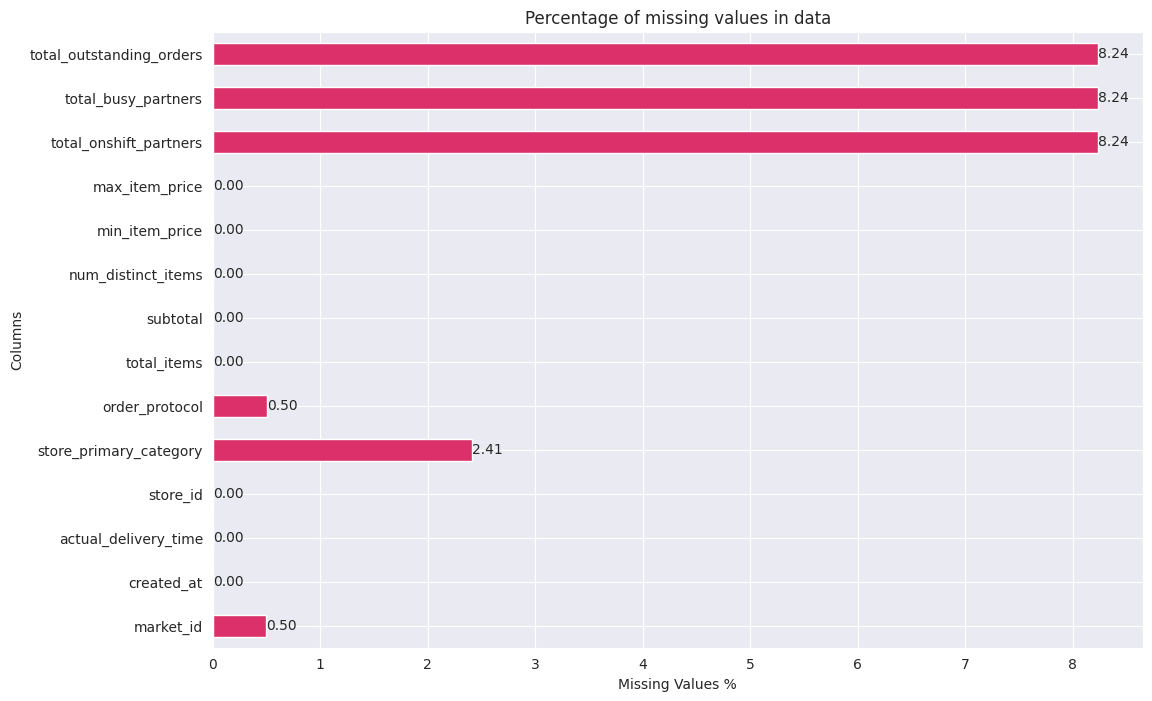

In [17]:
plt.figure(figsize = (12,8))
ax = ((df.isnull().sum()/df.shape[0])*100).plot(kind = 'barh', color = '#DB3069')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')
plt.xlabel('Missing Values %')
plt.ylabel('Columns')
plt.title('Percentage of missing values in data')
sns.set_style('darkgrid')
plt.show()

**Handling Missing Values in 'order_protocol' Column

In [18]:
df['order_protocol'].skew()

0.13709259426641762

**Inference**:

As column is discrete and not skewed we will use mode or most frequent value to impute missing values in the data

In [19]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
df['order_protocol'] = imputer.fit_transform(df[['order_protocol']])
df.isnull().sum()

market_id                     987
created_at                      0
actual_delivery_time            7
store_id                        0
store_primary_category       4760
order_protocol                  0
total_items                     0
subtotal                        0
num_distinct_items              0
min_item_price                  0
max_item_price                  0
total_onshift_partners      16262
total_busy_partners         16262
total_outstanding_orders    16262
dtype: int64

In [20]:
df

,market_id,created_at,actual_delivery_time,store_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,1.0,2015-02-06 22:24:17,2015-02-06 23:27:16,df263d996281d984952c07998dc54358,american,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:56:29,f0ade77b43923b38237db569b016ba25,mexican,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,3.0,2015-01-22 20:39:28,2015-01-22 21:09:09,f0ade77b43923b38237db569b016ba25,NaN,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,3.0,2015-02-03 21:21:45,2015-02-03 22:13:00,f0ade77b43923b38237db569b016ba25,NaN,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,3.0,2015-02-15 02:40:36,2015-02-15 03:20:26,f0ade77b43923b38237db569b016ba25,NaN,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197423,1.0,2015-02-17 00:19:41,2015-02-17 01:24:48,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,1.0,2015-02-13 00:01:59,2015-02-13 00:58:22,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,1.0,2015-01-24 04:46:08,2015-01-24 05:36:16,a914ecef9c12ffdb9bede64bb703d877,fast,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,1.0,2015-02-01 18:18:15,2015-02-01 19:23:22,c81e155d85dae5430a8cee6f2242e82c,sandwich,1.0,1,1175,1,535,535,7.0,7.0,12.0


**Dropping columns 'market_id, 'store_id', 'store_primary_category'**

Dropping the columns 'market_id', 'store_id', and 'store_primary_category' as they are not relevant to the given business context.

In [21]:
df = df.drop(columns = ['market_id', 'store_id', 'store_primary_category'])

In [22]:
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0


**Handling Missing Values in Continuos Columns

In [23]:
print(df['total_onshift_partners'].skew())
print(df['total_busy_partners'].skew())
print(df['total_outstanding_orders'].skew())


0.8607580961811951
0.7824625946552558
1.1953217621678773


**Inference**:

Since all three columns are right-skewed, median imputation is the appropriate method to fill the missing values in these columns.

In [24]:
cols = ['total_onshift_partners', 'total_busy_partners', 'total_outstanding_orders']
for col in  cols:
    df[col].fillna(df[col].median(), inplace=True)

In [25]:
df.isnull().sum()

created_at                  0
actual_delivery_time        7
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

**Dropping remaining Null Values**

In [26]:
df.dropna(inplace=True)
df.isnull().sum()

created_at                  0
actual_delivery_time        0
order_protocol              0
total_items                 0
subtotal                    0
num_distinct_items          0
min_item_price              0
max_item_price              0
total_onshift_partners      0
total_busy_partners         0
total_outstanding_orders    0
dtype: int64

In [27]:
df.shape

(197421, 11)

## 👾 Handling Outliers

**Outlier Detection using Box plot**

In [28]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['order_protocol', 'total_items', 'subtotal', 'num_distinct_items',
       'min_item_price', 'max_item_price', 'total_onshift_partners',
       'total_busy_partners', 'total_outstanding_orders'],
      dtype='object')

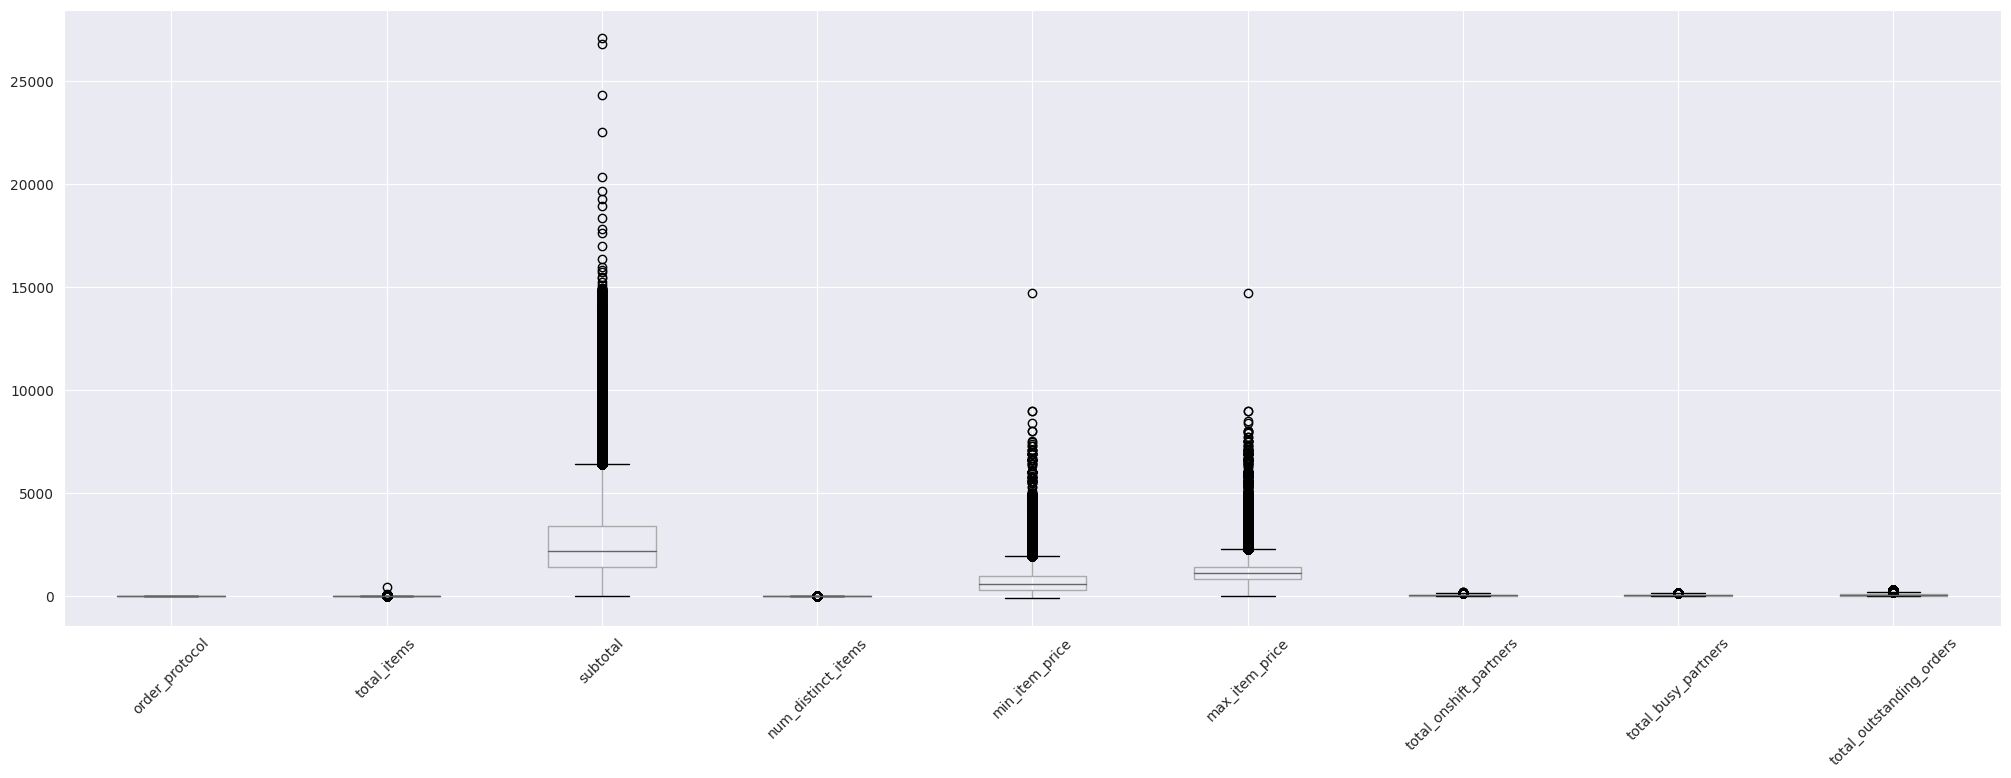

In [29]:
df[num_cols].boxplot(rot=45,figsize=(25,8))
plt.show()

**Handling outliers using LOF method**

In [30]:
len_before = len(df)
len_before

197421

In [31]:
from sklearn.neighbors import LocalOutlierFactor
model1 = LocalOutlierFactor()
df['LOF_anomaly_score'] = model1.fit_predict(df[num_cols])
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,LOF_anomaly_score
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0,1
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,1
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,1
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0,1
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0,1
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0,1
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0,1
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0,1


In [32]:
outliers = len(df.loc[(df['LOF_anomaly_score']==-1)])
print(f'Number of outliers:{outliers}')

Number of outliers:6595


In [33]:
df=df.loc[(df['LOF_anomaly_score'] == 1)]
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders,LOF_anomaly_score
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0,1
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,1
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0,1
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0,1
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0,1
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0,1
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0,1
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0,1


In [34]:
len_after = len(df)
len_after

190826

In [35]:
((len_before-len_after)/ (len_before))*100

3.3405767370239237

**Inference**

A total of 3.34% of outlier values have been removed from the dataset using the LOF method.

In [36]:
df.drop(columns = ['LOF_anomaly_score'],inplace=True)
df

,created_at,actual_delivery_time,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_partners,total_busy_partners,total_outstanding_orders
0,2015-02-06 22:24:17,2015-02-06 23:27:16,1.0,4,3441,4,557,1239,33.0,14.0,21.0
1,2015-02-10 21:49:25,2015-02-10 22:56:29,2.0,1,1900,1,1400,1400,1.0,2.0,2.0
2,2015-01-22 20:39:28,2015-01-22 21:09:09,1.0,1,1900,1,1900,1900,1.0,0.0,0.0
3,2015-02-03 21:21:45,2015-02-03 22:13:00,1.0,6,6900,5,600,1800,1.0,1.0,2.0
4,2015-02-15 02:40:36,2015-02-15 03:20:26,1.0,3,3900,3,1100,1600,6.0,6.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...
197423,2015-02-17 00:19:41,2015-02-17 01:24:48,4.0,3,1389,3,345,649,17.0,17.0,23.0
197424,2015-02-13 00:01:59,2015-02-13 00:58:22,4.0,6,3010,4,405,825,12.0,11.0,14.0
197425,2015-01-24 04:46:08,2015-01-24 05:36:16,4.0,5,1836,3,300,399,39.0,41.0,40.0
197426,2015-02-01 18:18:15,2015-02-01 19:23:22,1.0,1,1175,1,535,535,7.0,7.0,12.0


## 🛠️ Feature Engineering

**Extraction datetime Features**